In [1]:
import pandas as pd
import numpy as np

In [2]:
file1= pd.read_csv('marketing_customer_analysis.csv')
file1.shape


(10910, 26)

In [3]:
col=[]
for i in file1.columns:
    col.append(i.lower())
file1.columns=col

In [4]:
file1.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [5]:
file1=file1.drop(['unnamed: 0'],axis=1) 
#this column is the same as the index, so i think i can directly delete it

In [6]:
file1.head()


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
file1.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [8]:
#coustomer lifetime value, income, monthly premium auto, monthly since last claim, months since policy inception, number of open complaints, number of policies and total claim amount are numerical. The rest are categorical
file1.select_dtypes(include=object)
file1.select_dtypes(include=['float64','int64'])

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [9]:
file1.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [10]:
file1=file1.drop(['vehicle type'],axis=1) 
# Actually i don't know how to deal with this column. It has a large amount of NaN values. 
#It seems to be not proper to delete it but i can't find a good way to clear the NaN.

In [11]:
file1=file1.dropna()

In [12]:
file1['months since last claim'] =  pd.to_numeric(file1['months since last claim'], errors='coerce')
file1['number of open complaints'] =  pd.to_numeric(file1['number of open complaints'], errors='coerce')
file1 = file1.drop_duplicates()
file1 = file1.reset_index(drop=True)
file1.shape

(9134, 24)

In [13]:
mean_1=file1['months since last claim'].mean()
mean_2=file1['number of open complaints'].mean()
file1['months since last claim']=file1['months since last claim'].fillna(mean_1)
file1['number of open complaints']=file1['number of open complaints'].fillna(mean_2)


In [14]:
file1.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [15]:
file1['state'].value_counts(dropna=False)
file1['response'].value_counts(dropna=False)
file1['vehicle class'].value_counts(dropna=False)
file1['vehicle size'].value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle size, dtype: int64

In [16]:
file1['state']=file1['state'].fillna('California')
file1['response']=file1['response'].fillna('No')
file1['vehicle class']=file1['vehicle class'].fillna('Four-Door Car')
file1['vehicle size']=file1['vehicle size'].fillna('Medsize')

In [17]:
file1.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [18]:
#file1['month']=file1['effective to date'].str.split('/',expand=True)[0]#this is the method i use, but it seems not so formal as the method below
#file1.head()

In [19]:
file1['effective to date']=pd.to_datetime(file1['effective to date'],errors='coerce')#The classmate shares this method on slack
#file1['month1'] = pd.DatetimeIndex(file1['effective to date']).month
file1['month1']=file1['effective to date'].dt.month
file1.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month1
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2


In [20]:
data=file1[file1['month1'].isin([1,2,3])]
data.shape

(9134, 25)

# Round 3

In [21]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
%matplotlib inline

In [23]:
file1.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month1
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


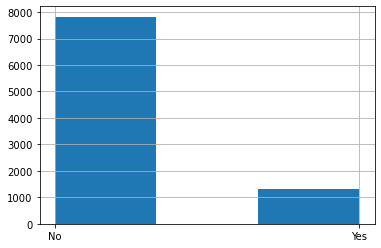

In [24]:
file1['response'].hist(bins=3)
plt.show()

In [25]:
file1['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [26]:
data['response']=file1['response'].apply(lambda x: 1 if str(x)=='Yes' else 0)
data['response'].value_counts()
#Is there any way that i can directly create a plot with two categorical objects?

0    7826
1    1308
Name: response, dtype: int64

<AxesSubplot:xlabel='sales channel', ylabel='response'>

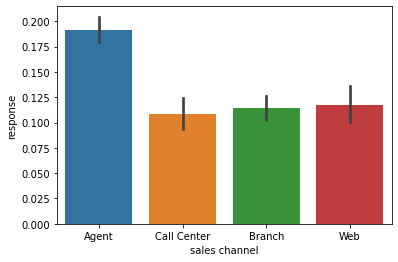

In [27]:
sns.barplot(x=file1["sales channel"], y=data['response'])


<AxesSubplot:xlabel='total claim amount', ylabel='Percent'>

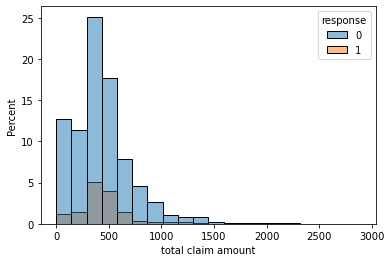

In [28]:
sns.histplot(x=file1['total claim amount'], hue=data['response'],bins=20,stat='percent')
#This histogram seems to be weird. I am not sure it is right or not.

<AxesSubplot:xlabel='income', ylabel='Percent'>

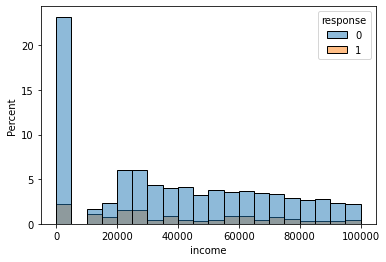

In [29]:
sns.histplot(x=file1['income'], hue=data['response'],bins=20,stat='percent')

# Round 4

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
%matplotlib inline

In [31]:
file1.shape

(9134, 25)

In [32]:
file1.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month1
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2


In [33]:
#file1=file1.drop(['vehicle size'],axis=1)
file1.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [34]:
numerical=file1.select_dtypes(include=np.number )
categoricals=file1.select_dtypes(include=np.object)

In [38]:
numerical.head()


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month1
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2


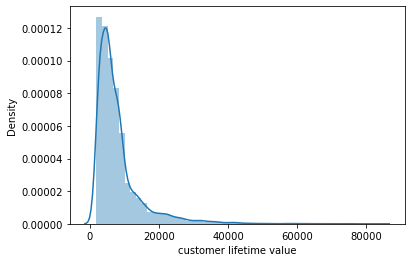

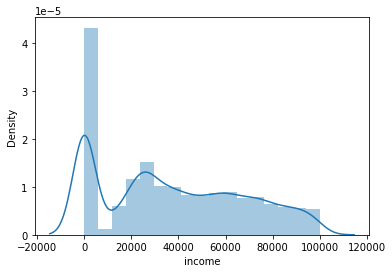

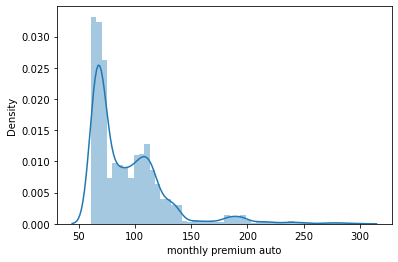

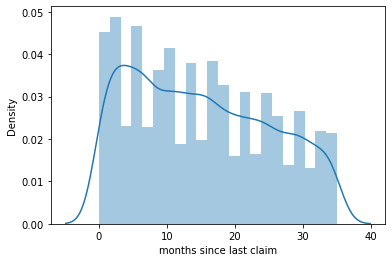

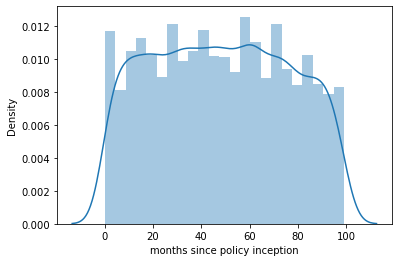

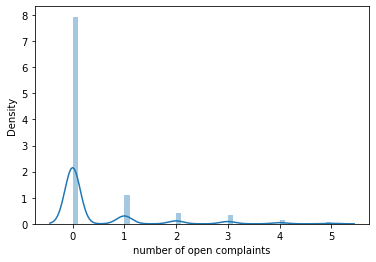

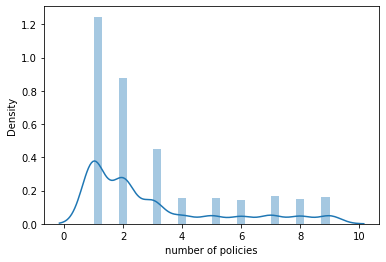

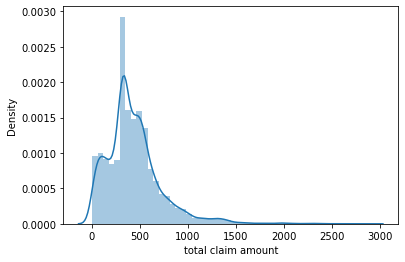

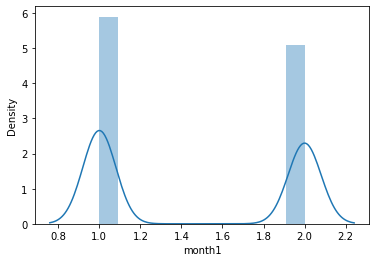

In [40]:
for i in range(len(numerical.columns)):
    sns.distplot(numerical.iloc[:,i])
    plt.show()


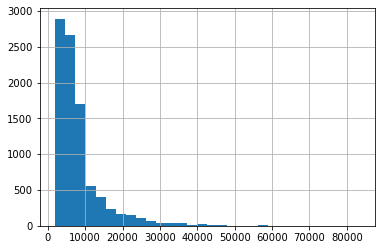

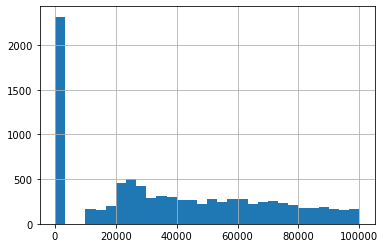

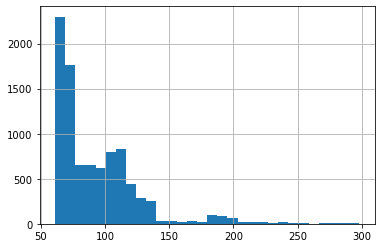

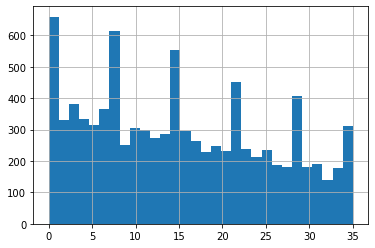

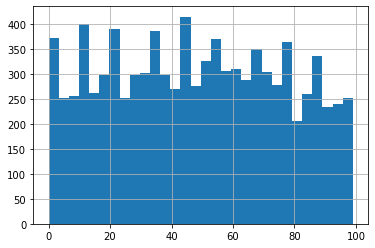

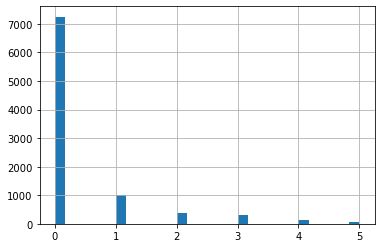

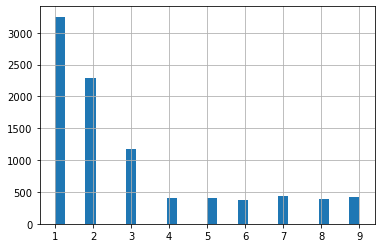

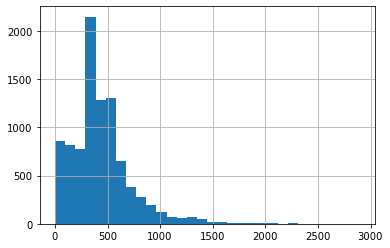

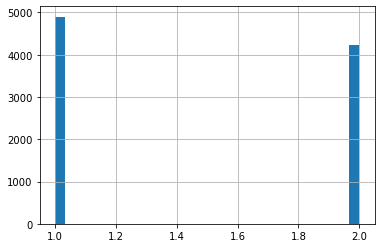

In [42]:
for i in numerical.columns:
    numerical[i].hist(bins=30)
    plt.show()

<AxesSubplot:xlabel='customer lifetime value', ylabel='Density'>

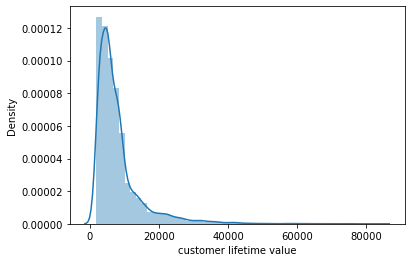

In [225]:
sns.distplot(numerical['customer lifetime value'])

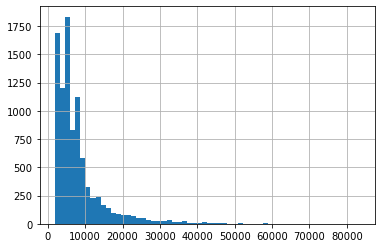

In [226]:
numerical['customer lifetime value'].hist(bins=60)
plt.show()


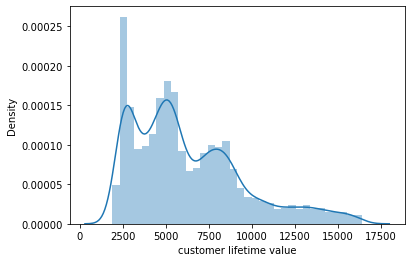

(8317, 9)

In [227]:

iqr = np.percentile(numerical['customer lifetime value'],75) - np.percentile(numerical['customer lifetime value'],25)
upper_limit = np.percentile(numerical['customer lifetime value'],75) + 1.5*iqr
lower_limit = np.percentile(numerical['customer lifetime value'],25) - 1.5*iqr
numerical = numerical[(numerical['customer lifetime value']>lower_limit) & (numerical['customer lifetime value']<upper_limit)]
sns.distplot(numerical['customer lifetime value'])
plt.show()
# After clearing the outliers the plot still seems to be far away from normal distribution. Is there still any way to transform the plot to make it more similar with the normal distribution
numerical.shape

<AxesSubplot:xlabel='income', ylabel='Density'>

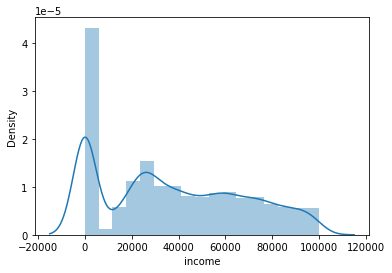

In [228]:
sns.distplot(numerical['income'])


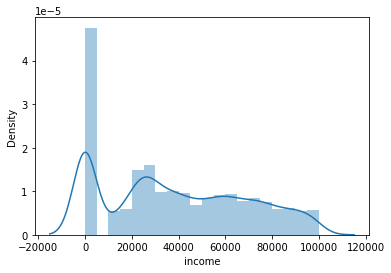

(7962, 9)

In [229]:
iqr1 = np.percentile(numerical['income'],75) - np.percentile(numerical['income'],25)
upper_limit = np.percentile(numerical['income'],75) + 1.5*iqr1
lower_limit = np.percentile(numerical['income'],25) - 1.5*iqr1
numerical = numerical[(numerical['income']>lower_limit) & (numerical['income']<upper_limit)]

iqr1 = np.percentile(numerical['total claim amount'],75) - np.percentile(numerical['total claim amount'],25)
upper_limit = np.percentile(numerical['total claim amount'],75) + 1.5*iqr1
lower_limit = np.percentile(numerical['total claim amount'],25) - 1.5*iqr1
numerical = numerical[(file1['total claim amount']>lower_limit) & (numerical['total claim amount']<upper_limit)]

sns.distplot(numerical['income'])
plt.show()
numerical.shape

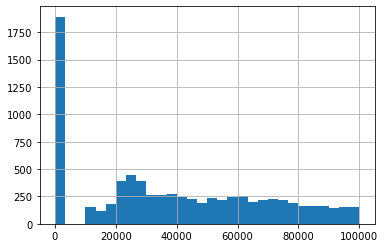

In [230]:
numerical['income'].hist(bins=30)
plt.show()

<AxesSubplot:xlabel='total claim amount', ylabel='Density'>

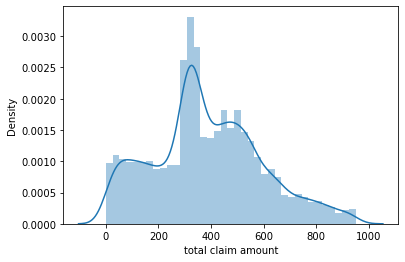

In [231]:
sns.distplot(numerical['total claim amount'])

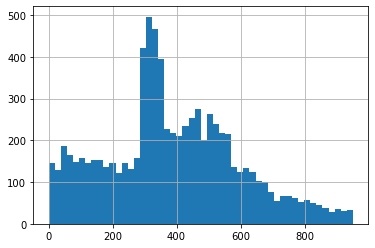

In [232]:
numerical['total claim amount'].hist(bins=50)
plt.show()

<AxesSubplot:xlabel='months since policy inception', ylabel='Density'>

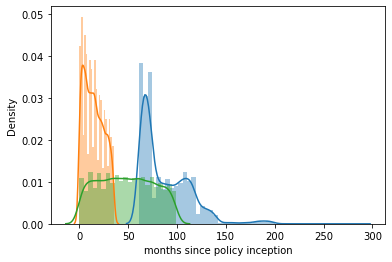

In [219]:
sns.distplot(numerical['monthly premium auto'])
sns.distplot(numerical['months since last claim'])
sns.distplot(numerical['months since policy inception'])
#sns.distplot(file1['number of open complaints'])
#sns.distplot(file1['number of policies'])

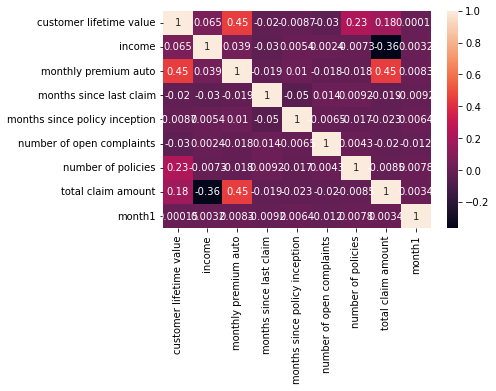

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month1
customer lifetime value,1.000000,0.065009,0.447199,-0.019749,-0.008707,-0.030458,0.231886,0.178840,0.000150
income,0.065009,1.000000,0.038608,-0.030372,0.005444,0.002447,-0.007312,-0.364462,0.003193
monthly premium auto,0.447199,0.038608,1.000000,-0.018619,0.010059,-0.017790,-0.017795,0.447145,0.008275
months since last claim,-0.019749,-0.030372,-0.018619,1.000000,-0.049657,0.013626,0.009242,-0.018871,-0.009228
months since policy inception,-0.008707,0.005444,0.010059,-0.049657,1.000000,-0.006453,-0.016710,-0.022779,0.006405
number of open complaints,-0.030458,0.002447,-0.017790,0.013626,-0.006453,1.000000,0.004317,-0.019920,-0.011699
number of policies,0.231886,-0.007312,-0.017795,0.009242,-0.016710,0.004317,1.000000,-0.008459,0.007772
total claim amount,0.178840,-0.364462,0.447145,-0.018871,-0.022779,-0.019920,-0.008459,1.000000,0.003405
month1,0.000150,0.003193,0.008275,-0.009228,0.006405,-0.011699,0.007772,0.003405,1.000000


In [235]:
correlations_matrix = numerical.corr()

sns.heatmap(correlations_matrix, annot=True)
plt.show()
correlations_matrix


In [ ]:
# In this case there is no strong correlation between the numerical columns. Therefore there is no multicollinearity.

# Round 5

In [238]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [239]:
numerical.shape

(7962, 9)

In [240]:
y=numerical['total claim amount']
x=numerical.drop(['total claim amount'],axis=1)

In [241]:
numerical.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month1
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
5,4956.247235,87197,63,35.0,45,0.0,3,247.402353,2


In [244]:
transformer = MinMaxScaler().fit(x)
x_normalized = transformer.transform(x)
print(x_normalized.shape)
x_normalized
data_new=pd.DataFrame(x_normalized, columns=x.columns)
data_new.head()

(7962, 8)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month1
0,0.200639,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.022779,0.000000,0.013393,0.085714,0.262626,0.0,0.000,0.0
2,0.899395,0.221432,0.174107,0.971429,0.313131,0.0,0.125,1.0
3,0.216203,0.374121,0.008929,0.228571,1.000000,0.6,0.375,1.0
4,0.210773,0.872136,0.008929,1.000000,0.454545,0.0,0.250,1.0


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month1
customer lifetime value,1.000000,0.065009,0.447199,-0.019749,-0.008707,-0.030458,0.231886,0.000150
income,0.065009,1.000000,0.038608,-0.030372,0.005444,0.002447,-0.007312,0.003193
monthly premium auto,0.447199,0.038608,1.000000,-0.018619,0.010059,-0.017790,-0.017795,0.008275
months since last claim,-0.019749,-0.030372,-0.018619,1.000000,-0.049657,0.013626,0.009242,-0.009228
months since policy inception,-0.008707,0.005444,0.010059,-0.049657,1.000000,-0.006453,-0.016710,0.006405
number of open complaints,-0.030458,0.002447,-0.017790,0.013626,-0.006453,1.000000,0.004317,-0.011699
number of policies,0.231886,-0.007312,-0.017795,0.009242,-0.016710,0.004317,1.000000,0.007772
month1,0.000150,0.003193,0.008275,-0.009228,0.006405,-0.011699,0.007772,1.000000
